# Stock price prediction



## Introduction 
This tutorial is to demonstrate the process flow of building time series forecast algorithms from scratch. For further reading [mape vs smape](https://towardsdatascience.com/choosing-the-correct-error-metric-mape-vs-smape-5328dec53fac)
[mape vs wape vs wmape](https://www.baeldung.com/cs/mape-vs-wape-vs-wmape)
<br>

>**Example of time series forecasting flow diagram:**


This exercise will use five different types of time series forecast model to solve the problem:

1. Naive Forecast
2. Exponential Smoothing Average
3. ARIMA 
4. SARIMA
5. LSTM

## Problem Statement





## Notebook Outline
Below is the outline for this tutorial
1. [Basic Analytics](#BasicAnalytics)
    * [Data Preparation](#DataPreparation)
    * [Data Visualization](#DataVisualization)
    * [Data Splitting](#DataSplitting)
    * [ACF Plot](#ACFPlot)
    * [Time Series Decomposition](#TimeSeriesDecomposition)
    
2. [Time Series Modeling with Statistical Method](#TimeSeriesModelingwithStatisticalMethod)
    * [Naive Forecast](#NaiveForecast)
    * [Exponential Moving Average](#ExponentialMovingAverage)
        * [Simple Exponential Moving Average (SEMA)](#SimpleExponentialMovingAverage(SEMA))
        * [Holt-Winters Exponential Moving Average Method](#Holt-WintersMethod)
    * [ARIMA Forecast](#ARIMAForecast)
        * [Log Transform](#LogTransform)
        * [Seasonal Differencing (Deseasonalize)](#SeasonalDifferencing(Deseasonalize))
        * [ADF Test](#ADFTest)
        * [1st order differencing (Detrending)](#1storderdifferencing(Detrending))
        * [ACF and PACF plot](#ACFandPACFplot)
        * [ARIMA model configuration](#ARIMAmodelconfiguration)
        * [ARIMA model forecast](#ARIMAmodelforecast)
        * [Reverse Differencing](#ReverseDifferencing)
            * [Reverse 1st order differencing](#Reverse1storderdifferencing)
            * [Reverse seasonal differencing](#Reverseseasonaldifferencing)
        * [Inverse Log Transform](#InverseLogTransform)
    * [SARIMA Forecast](#SARIMAForecast)
    
3. [Time Series Modeling with Deep Learning Method (LSTM)](#TimeSeriesModelingwithDeepLearningMethod(LSTM))
    * [Hyperparamter](#Hyperparamter)
    * [Data Scaling](#DataScaling)
    * [Window Sliding](#WindowSliding)
    * [Data Iterator](#DataIterator)
    * [LSTM configuration](#LSTM)
    * [Input Model](#InputModel)
    * [Model Summary](#ModelSummary)
    * [Training](#Training)
    * [Validation](#Validation)
4. [Summary](#Summary)
5. [Reference](#Reference)

First, let's import the package needed.

In [48]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [49]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.holtwinters import Holt, ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

from matplotlib import pylab
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline 
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
import warnings
warnings.filterwarnings("ignore")

## <a name="BasicAnalytics">1. Basic Analytics</a>
### <a name="DataPreparation">1.1 - Data Preparation


In [50]:
# Data Preparation
import pandas as pd
data = pd.read_csv("Tesla.csv - Tesla.csv.csv")
data["date"] = pd.to_datetime(data["Date"])
data.set_index("date", inplace=True)
stock_data = data["Close"]

In [51]:
stock_data.head()

date
2010-06-29    23.889999
2010-06-30    23.830000
2010-07-01    21.959999
2010-07-02    19.200001
2010-07-06    16.110001
Name: Close, dtype: float64

### <a name="DataVisualization">1.2 - Data Visualization

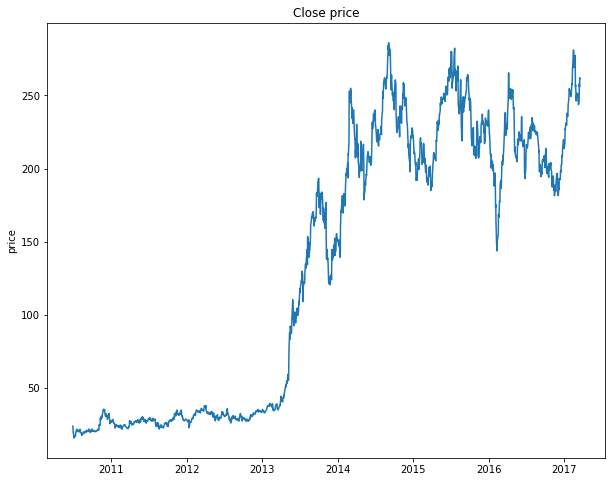

In [52]:
# Visualize the data
plt.plot(stock_data)

plt.title("Close price")
plt.ylabel("price");

As you can notice, the data have shown that it has increased in trend and it contains seasonality.

### <a name="DataSplitting">1.3 - Data Splitting
Split the data into train and test data using `train_test_split`

In [53]:
# Data Splitting
train_data = stock_data[:int(len(stock_data) * 0.7)]
test_data = stock_data[int(len(stock_data) * 0.7):]

Before we build the model, we must analyze the time series data pattern. There are two ways to visualize the data seasonality:
1. ACF plot
2. Time Series Decomposition

### <a name="ACFPlot"> 1.4 - ACF Plot

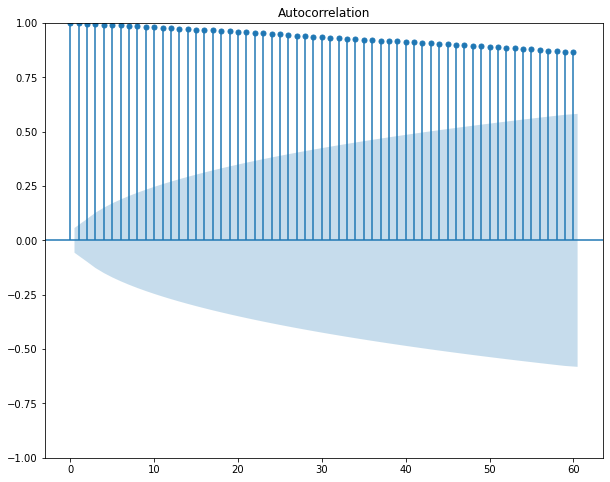

In [54]:
# Create ACF Plot
plot_acf(train_data,lags = 60)
plt.show()

### <a name="TimeSeriesDecomposition">1.5 - Time Series Decomposition


In [56]:
# Time Series Decomposition
stock_data.fillna(method='ffill')
result = seasonal_decompose(stock_data, model='multiplicative')
result.plot()
plt.show()


ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

## <a name="TimeSeriesModelingwithStatisticalMethod">2. Time Series Modeling with Statistical Method
### <a name="NaiveForecast">2.1 - Naive Forecast
First, we will use the naive forecast method as our benchmark model. We only accept those model that is out performing than the naive forecast model based on the result.


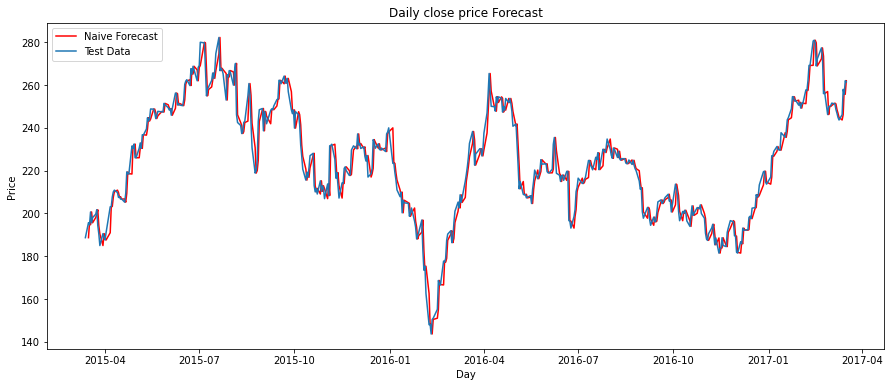

In [57]:
# Naive forecast method 
naive_forecast = test_data.shift(1)

# Function to plot the forecast data
def forecast_plot(forecast_data,forecast_label, test_label='Test Data',test_time = test_data.index
,test_data= test_data):
    plt.figure(figsize=(15,6))
    plt.plot(test_time,forecast_data,'r',label = forecast_label,)
    plt.plot(test_time,test_data,label = test_label)
    plt.legend()
    plt.title("Daily close price Forecast")
    plt.xlabel("Day")
    plt.ylabel("Price")
    
# Plot the forecast data
forecast_plot(forecast_data = naive_forecast,forecast_label = 'Naive Forecast')    

In [58]:
# Calculate RMSE of naive model
testScore_naive = math.sqrt(mean_squared_error(test_data[1:], naive_forecast[1:]))
testScore_naive

5.367061573760717

In [59]:
# Save the result into Dataframe
result = pd.DataFrame({'Naive Forecast' :testScore_naive},index=["RMSE"])
result

,Naive Forecast
RMSE,5.367062


### <a name="ExponentialMovingAverage">2.2 - Exponential Moving Average 
#### <a name="SimpleExponentialMovingAverage(SEMA)">2.2.1 - Simple Exponential Moving Average (SEMA)



In [60]:
# Simple Exponential Moving Average (SEMA)

sema = SimpleExpSmoothing(train_data).fit()
sema_forecast = sema.forecast(len(test_data))
sema_forecast.head()

1184    191.070007
1185    191.070007
1186    191.070007
1187    191.070007
1188    191.070007
dtype: float64

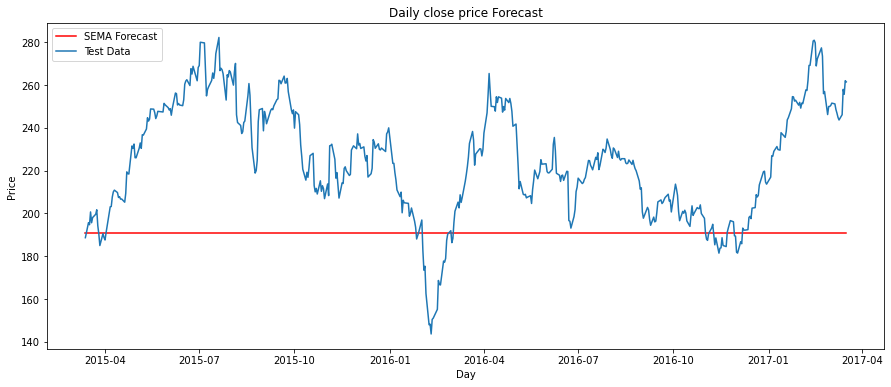

In [61]:
# Forecast data plot
forecast_plot(forecast_data = sema_forecast,forecast_label = 'SEMA Forecast' )    

In [62]:
# # Save the result into Dataframe
sema_forecast_result = math.sqrt(mean_squared_error(sema_forecast,test_data))
result['SEMA'] =  sema_forecast_result 
result

,Naive Forecast,SEMA
RMSE,5.367062,42.434488


It seems like Simple Exponential Moving Average is not a good model for the data with seasonality.

### <a name="ARIMAForecast">2.3 - ARIMA Forecast

#### <a name="LogTransform">2.3.1 - Log Transform

Text(0, 0.5, 'Price')

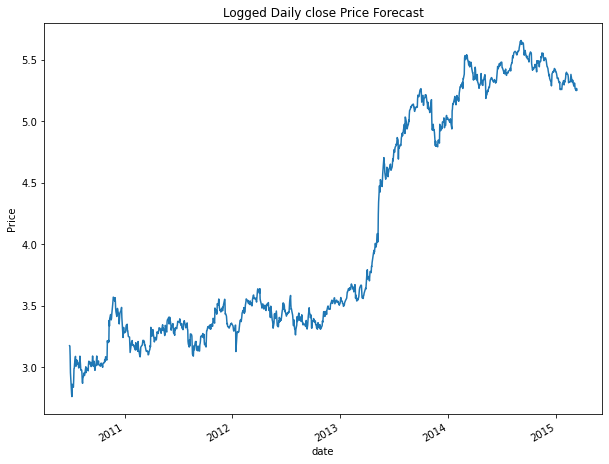

In [63]:
# Log Transform 
train_data_log = np.log(train_data)
train_data_log.plot()
plt.title("Logged Daily close Price Forecast")
plt.ylabel("Price")

#### <a name="SeasonalDifferencing(Deseasonalize)">2.3.2 -  Seasonal Differencing (Deseasonalize)


Text(0, 0.5, 'Price')

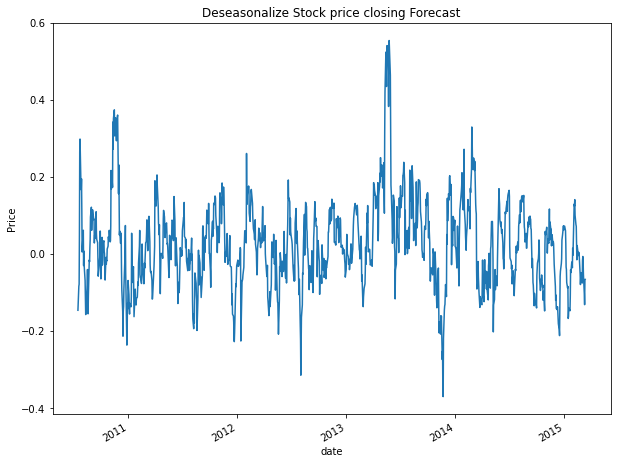

In [64]:
# Seasonal Differencing
differencing_month = 12 
remove_seasonal = train_data_log.diff(differencing_month)
deseasonal_data = remove_seasonal[differencing_month:]
deseasonal_data.plot()
plt.title("Deseasonalize Stock price closing Forecast")
plt.ylabel("Price")

After removing the seasonality, it is essential to perform an `ADF` test to check whether the data is achieved through stationary data. The data after seasonal differencing still have the trend properties, which will make the data non-stationary.

#### <a name="ADFTest"> 2.3.3 - ADF Test

In [65]:
# ADF Test
def print_adf_result(adf_result):
    df_results = pd.Series(adf_result[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
    
    for key, value in adf_result[4].items():
        df_results['Critical Value (%s)'% key] = value
    print('Augmented Dickey-Fuller Test Results:')
    print(df_results)
    

adf_result = adfuller(deseasonal_data, maxlag=12)
print_adf_result(adf_result)

Augmented Dickey-Fuller Test Results:
ADF Test Statistic        -5.130906
P-Value                    0.000012
# Lags Used               12.000000
# Observations Used     1159.000000
Critical Value (1%)       -3.436005
Critical Value (5%)       -2.864037
Critical Value (10%)      -2.568099
dtype: float64


It seems that the data is not stationary yet. You are required to perform 1st order differencing to make the data stationary.

####  <a name="1storderdifferencing(Detrending)">2.3.4 - 1st order differencing (Detrending)


Text(0, 0.5, 'Price')

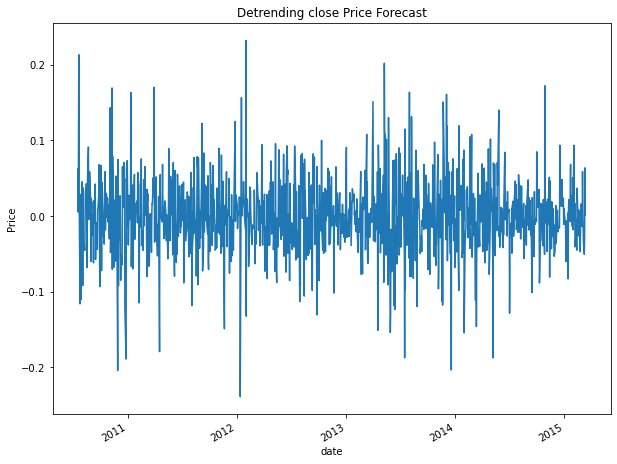

In [66]:
# 1st order differencing (Detrending

remove_trend = deseasonal_data.diff(1)

#Skip the NaN row
detrend_data = remove_trend[1:]

detrend_data.plot()
plt.title("Detrending close Price Forecast")
plt.ylabel("Price")

In [67]:
# ADF Test
result_adf = adfuller(detrend_data, maxlag=12)
print_adf_result(result_adf)

Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -1.660939e+01
P-Value                 1.736307e-29
# Lags Used             1.100000e+01
# Observations Used     1.159000e+03
Critical Value (1%)    -3.436005e+00
Critical Value (5%)    -2.864037e+00
Critical Value (10%)   -2.568099e+00
dtype: float64


The ADF test show that the data is in stationary now.

#### <a name="ACFandPACFplot">2.3.5 -  ACF and PACF plot
After the data is stationary, use `ACF` and `PACF` to find the `p` and `q` parameters for ARIMA model.<br>
Remind that:  <br>
`p` is determined by `PACF`<br>
`q` is determined by `ACF`<br>


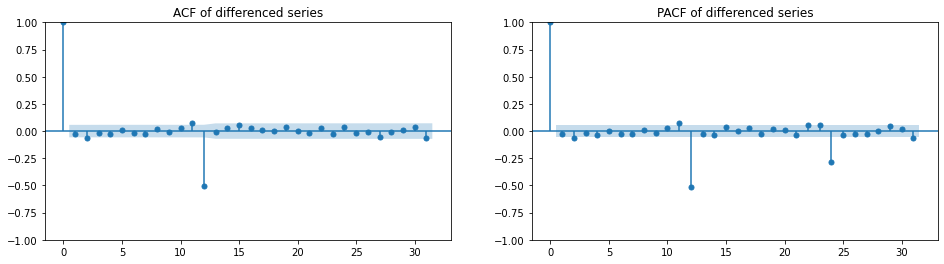

In [68]:
# ACF and PACF plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))

plot_acf(detrend_data, ax1)
plot_pacf(detrend_data, ax2)

ax1.set_title('ACF of differenced series')
ax2.set_title('PACF of differenced series')
plt.show()

#### <a name="ARIMAmodelconfiguration">2.3.6 - ARIMA model configuration

In [88]:
#  Define ARIMA model
arima = ARIMA(detrend_data.dropna(), order=(12,1,1)).fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1171
Model:                ARIMA(12, 1, 1)   Log Likelihood                1997.594
Date:                Tue, 24 Jan 2023   AIC                          -3967.189
Time:                        22:56:53   BIC                          -3896.282
Sample:                             0   HQIC                         -3940.445
                               - 1171                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0407      0.022      1.856      0.063      -0.002       0.084
ar.L2         -0.0171      0.023     -0.744      0.457      -0.062       0.028
ar.L3          0.0032      0.025      0.129      0.897      -0.046       0.052
ar.L4         -0.0277      0.026     -1.077      0.282      -0.078       0.023
ar.L5         -0.0208      0.025     -0.841      0.400      -0.069       0.028
ar.L6         -0.0257      0.026     -0.972      0.331      -0.078       0.026
ar.L7         -0.0410      0.025     -1.663      0.096      -0.089       0.007
ar.L8         -0.0282      0.025     -1.137      0.256      -0.077       0.020
ar.L9         -0.0491      0.027     -1.806      0.071      -0.102       0.004
ar.L10        -0.0255      0.025     -1.024      0.306      -0.074       0.023
ar.L11         0.0206      0.024      0.857      0.392      -0.026       0.068
ar.L12        -0.5665      0.018    -31.532      0.000      -0.602      -0.531
ma.L1         -0.9659      0.011    -85.523      0.000      -0.988      -0.944
sigma2         0.0019   5.57e-05     34.079      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   3.44   Jarque-Bera (JB):               216.61
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### <a name="ARIMAmodelforecast">2.3.6 - ARIMA model forecast

In [ ]:
#  ARIMA model forecast

def arima_forecast(test_data):
    forecast= arima.forecast(len(test_data))
    forecast = pd.Series(forecast, index=test_data.index)
    return forecast
forecast_ar=arima_forecast(test_data)
forecast_ar = pd.Series(forecast_ar)
forecast_ar

date
2015-03-13   NaN
2015-03-16   NaN
2015-03-17   NaN
2015-03-18   NaN
2015-03-19   NaN
              ..
2017-03-13   NaN
2017-03-14   NaN
2017-03-15   NaN
2017-03-16   NaN
2017-03-17   NaN
Name: predicted_mean, Length: 508, dtype: float64

In [ ]:
# Save the result into Dataframe
forecast = math.sqrt(mean_squared_error(forecast_ar,test_data))
result['ARIMA Forecast'] =  forecast
result

NameError: name 'math' is not defined

### <a name="SARIMAForecast">2.4 - SARIMA Forecast


In [ ]:
!pip install pmdarima

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
import pmdarima as pm


auto_arima = pm.arima.auto_arima(train_data, m=12,
                            trace=True, seasonal=True,
                            error_action='ignore',  
                            suppress_warnings=True)


In [ ]:
# SARIMA Summary
auto_arima.summary()

In [ ]:
# SARIMA model prediction
auto_arima_forecast = auto_arima.predict(len(test_data))
auto_arima_forecast_series = pd.Series(auto_arima_forecast, index=test_data.index)

In [ ]:
# Plot the forecast data
forecast_plot(forecast_data = auto_arima_forecast_series, forecast_label = 'SARIMA Forecast') 

In [ ]:
# Save the result into Dataframe
sarima_result = math.sqrt(mean_squared_error(test_data,auto_arima_forecast_series))
result['SARIMA Forecast'] =  sarima_result
result

# <a name="TimeSeriesModelingwithDeepLearningMethod(MLP)">3. Time Series Modeling with Deep Learning Method (MLP)

### <a name="Hyperparamter">3.1 - Hyperparamter

In [ ]:
# Hyperparamter
window_size = 3
n_epoch = 500
batch_size = 5 

### <a name="DataScaling">3.2 - Data Scaling


In [ ]:
# Data Scaling
scaler = StandardScaler().fit(train_data)
train_data_scale = scaler.transform(train_data)
test_data_scale = scaler.transform(test_data)

### <a name="WindowSliding">3.3 - Window Sliding 
#### Optional 1 - Use the previous sliding window function

In [ ]:
# Window Sliding Function
def sliding_window(univariate_data,window_size):
    x,y = list(),list()
    for i in range(len(univariate_data)):
        end_ix = i + window_size
        if end_ix > len(univariate_data)-1:
            break
        seq_x, seq_y = univariate_data[i:end_ix], univariate_data[end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x),np.array(y)

train_feature , train_label = sliding_window(train_data_scale,window_size)
test_feature , test_label = sliding_window(test_data_scale,window_size)

### <a name="DataIterator">3.4 - Data Iterator

#### TensorDataset


In [ ]:
trainX = torch.from_numpy(train_feature).type(torch.Tensor)
trainY = torch.from_numpy(train_label).type(torch.Tensor)
testX = torch.from_numpy(test_feature).type(torch.Tensor)
testY = torch.from_numpy(test_label).type(torch.Tensor)


train_dataset = TensorDataset(trainX,trainY)
test_dataset = TensorDataset(testX,testY)


train_iterator = DataLoader(train_dataset,batch_size,shuffle = False)
test_iterator = DataLoader(test_dataset,batch_size,shuffle = False)

### LSTM configuration



In [ ]:
# LSTM configuration
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear= nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.linear(out[-1])
        return out
    

### <a name="InputModel">3.6 - Input Model

In [ ]:
input_size = 1
hidden_size = 50
output_size = 1
model = LSTMModel(input_size, hidden_size, output_size)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr= 0.01)

### <a name="ModelSummary">3.7 - Model Summary

### <a name="Training">3.8 - Training

In [ ]:
def training(num_epochs,train_iter,test_iter,optimizer,loss_fn,model):
    # Create a list of zero value to store the averaged value
    train_loss = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    
    
    
    for t in range(num_epochs):
        
        # Initial the value to be zero to perform cumulative sum 
        running_loss_train = 0
        running_loss_valid = 0
        
        # For loop to loop through each data in the data iterator
        for _,(train_X,train_Y) in enumerate(train_iter):
            
            # Forward pass
            y_train_pred = model(train_X)

            # Reshape to ensure the predicted output (y_train_pred) same size with train_Y shape
            y_train_pred=torch.reshape(y_train_pred,(train_Y.shape[0],train_Y.shape[1]))
            
            # Compare the value using MSE
            loss_train = loss_fn(y_train_pred, train_Y)

            # Zero out gradient, else they will accumulate between batches
            optimizer.zero_grad()

            # Backward pass
            loss_train.backward()

            # Update parameters
            optimizer.step()
            
            # Since the loss_train.item will only return the average loss based number of batches
            # loss_train.item()*train_X.size(0) -> to make it multiply with batch size 
            running_loss_train += loss_train.item()*train_X.size(0)
            
        # Average the loss base on total batch size ,train_iter.dataset is use to get the total batch size 
        epoch_loss_train = running_loss_train /len(train_iter.dataset)
        # Store the averaged value
        train_loss[t] = epoch_loss_train
        
        # Validate the test data loss
        with torch.no_grad():
            # For loop to loop through each data in the data iterator
            for _,(test_X,test_Y) in enumerate(test_iter):
                y_test_pred = model(test_X)

                # Reshape to ensure the predicted output (y_test_pred) same size with test_y shape
                y_test_pred=torch.reshape(y_test_pred,(test_Y.shape[0],test_Y.shape[1]))
                
                # Calculate the loss 
                loss_test = loss_fn(y_test_pred, test_Y)
                
                # Summing up the loss over each batch
                running_loss_valid += loss_test.item()*test_X.size(0)
                
        # Average the loss base on total batch size 
        epoch_loss_test =running_loss_valid /len(test_iter.dataset)
        
        # Store the averaged value
        val_loss[t] = epoch_loss_test
        
 
    return train_loss,val_loss

In [80]:
train_loss,val_loss = training(n_epoch,train_iterator,test_iterator,optimizer,loss_fn,model)

NameError: name 'training' is not defined

In [ ]:
for i in range(n_epoch):
    print(f"Epoch: {i}, train loss: {train_loss[i]} ,test loss: {val_loss[i]}")

### <a name="Validation">3.9 - Validation

In [ ]:
with torch.no_grad():
    train_prediction = model(trainX)
    test_prediction = model(testX)

In [ ]:
# Inverse Scaling
train_label_rescale = scaler.inverse_transform(train_label)
test_label_rescale = scaler.inverse_transform(test_label)
train_prediction_rescale = scaler.inverse_transform(train_prediction)
test_prediction_rescale = scaler.inverse_transform(test_prediction)

In [ ]:
print("Test Data\t\t\tForecast Data")
for i in range(len(test_label_rescale )):
    print(f"{test_label_rescale[i]}\t\t{test_prediction_rescale[i]}")

In [ ]:
# Plot the Forecast Data
forecast_plot(forecast_data = test_label_rescale, 
              forecast_label = 'lstm Forecast',
              test_time=test_time[window_size:],
              test_data=test_prediction_rescale) 

In [ ]:
lstm_train_result = math.sqrt(mean_squared_error(train_label_rescale,train_prediction_rescale))
lstm_forecast_result = math.sqrt(mean_squared_error(test_label_rescale,test_prediction_rescale))
print('Train Score: %.2f RMSE' % (lstm_train_result))
print('Test Score: %.2f RMSE' % (lstm_forecast_result))

In [ ]:
result['lstm Forecast'] =  lstm_forecast_result
result

In conclusion, lstm model gives the lowest RMSE which is appropriate to make it as our forecast model for future unseen data. The second option goes to SARIMA model which has a slightly higher RMSE than lstm model, but have a faster runtime.

## <a name="Reference">Reference
1. [Deep Learning for Time Series Forecasting (Predict the Future with MLPs,CNNs and LSTMs in Python) , Jason Brownlee](https://machinelearningmastery.com/deep-learning-for-time-series-forecasting/)
2. [Time-series Forecasting Flow](https://towardsdatascience.com/time-series-forecasting-flow-2e49740664de)